# Imports

In [ ]:
import glob
import itertools
import json
import os
import random
import time
from datetime import datetime
from math import comb

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

from subclass_classifier import (SubclassClassifier, load_saved_data,
                                 run_experiment_pipeline)

if not os.path.exists('results'):
    os.makedirs('results')

# Load data

In [2]:
train_inputs, test_inputs, train_outputs, test_outputs = load_saved_data()
y_train = np.array([np.argmax(output[0]) + 1 for output in train_outputs])
print(y_train)
y_test = np.array([np.argmax(output[0]) + 1 for output in test_outputs])
print(y_test)

display(len(train_inputs))
display(len(test_inputs))

speakers = [
    {'id': 1, 'start_idx': 0, 'num_samples': 30},
    {'id': 2, 'start_idx': 30, 'num_samples': 30},
    {'id': 3, 'start_idx': 60, 'num_samples': 30},
    {'id': 4, 'start_idx': 90, 'num_samples': 30},
    {'id': 5, 'start_idx': 120, 'num_samples': 30},
    {'id': 6, 'start_idx': 150, 'num_samples': 30},
    {'id': 7, 'start_idx': 180, 'num_samples': 30},
    {'id': 8, 'start_idx': 210, 'num_samples': 30},
    {'id': 9, 'start_idx': 240, 'num_samples': 30},
]

Data loaded successfully from data/
Train samples: 270, Test samples: 370
Input dimensions: 12, Output dimensions: 9
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4

270

370

# Perform Basic Run for Validation

In [3]:
classifier = SubclassClassifier(U=4, V=20, K=1, s=100, verbose=True, random_state=42)
classifier.fit(train_inputs, speaker_config=speakers)

Starting SubclassClassifier fit...
Step 1: Creating binning grid (U=4, V=20, K=1)
Step 2: Converting training data to binary vectors...
  Processing curve 1/270...
  Processing curve 51/270...
  Processing curve 101/270...
  Processing curve 151/270...
  Processing curve 201/270...
  Processing curve 251/270...
  Binary vector length: 27360
Step 3: Learning subclasses for each speaker...
  Processing Speaker 1 (samples 0 to 29)...
Speaker (start_idx=0, num_samples=30):
  Positive samples: 30
  Negative samples: 240
Starting randomized subclass method with 30 positive samples, 100 iterations
Termination condition met at iteration 1
Completed: Found 1 unique subclasses
    Found 1 subclasses
  Processing Speaker 2 (samples 30 to 59)...
Speaker (start_idx=30, num_samples=30):
  Positive samples: 30
  Negative samples: 240
Starting randomized subclass method with 30 positive samples, 100 iterations
Termination condition met at iteration 1
Completed: Found 1 unique subclasses
    Found 1 su

,U,4
,V,20
,K,1
,s,100
,verbose,True
,save_results,False
,results_dir,'results'
,random_state,42


In [4]:
accuracy = classifier.score(test_inputs, y_test)
#predictions = classifier.predict(test_inputs)
print(f"Accuracy: {accuracy:.4f}")

Predicting 370 samples...
  Processing test curve 1/370...
  Processing test curve 51/370...
  Processing test curve 101/370...
  Processing test curve 151/370...
  Processing test curve 201/370...
  Processing test curve 251/370...
  Processing test curve 301/370...
  Processing test curve 351/370...
  Classifying test sample 1/370...
  Classifying test sample 51/370...
  Classifying test sample 101/370...
  Classifying test sample 151/370...
  Classifying test sample 201/370...
  Classifying test sample 251/370...
  Classifying test sample 301/370...
  Classifying test sample 351/370...
Prediction completed in 63.01 seconds
Accuracy: 0.9243


In [12]:
# Save detailed experiment results
results = classifier.save_experiment_results(
    X_test=test_inputs, 
    y_test=y_test, 
    experiment_name="baseline_experiment"
)

Predicting 370 samples...
  Processing test curve 1/370...
  Processing test curve 51/370...
  Processing test curve 101/370...
  Processing test curve 151/370...
  Processing test curve 201/370...
  Processing test curve 251/370...
  Processing test curve 301/370...
  Processing test curve 351/370...
  Classifying test sample 1/370...
  Classifying test sample 51/370...
  Classifying test sample 101/370...
  Classifying test sample 151/370...
  Classifying test sample 201/370...
  Classifying test sample 251/370...
  Classifying test sample 301/370...
  Classifying test sample 351/370...
Prediction completed in 63.85 seconds
Results saved to results/baseline_experiment.json


In [13]:
print(results)

{'experiment_name': 'baseline_experiment', 'parameters': {'U': 4, 'V': 20, 'K': 1, 's': 100, 'verbose': True, 'save_results': False, 'results_dir': 'results'}, 'accuracy': 0.927027027027027, 'confusion_matrix': [[29, 0, 0, 0, 0, 0, 0, 1, 1], [0, 28, 5, 0, 0, 0, 0, 2, 0], [0, 0, 86, 0, 0, 0, 0, 2, 0], [0, 0, 0, 42, 0, 0, 1, 1, 0], [1, 0, 1, 0, 25, 0, 0, 2, 0], [0, 0, 0, 0, 0, 24, 0, 0, 0], [0, 0, 0, 0, 0, 0, 39, 0, 1], [0, 1, 1, 0, 0, 0, 0, 45, 3], [3, 0, 1, 0, 0, 0, 0, 0, 25]], 'subclass_counts': {1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 62}, 'fit_time_seconds': 64.97544980049133, 'predict_time_seconds': 63.85186219215393, 'timestamp': '2025-10-22T11:51:57.524424', 'n_train_samples': 270, 'n_test_samples': 370}


# Run experimnet pipeline

## Big Grid Search

In [ ]:
# Define parameter ranges
U_values = [3, 4, 5, 6, 7]
V_values = [15, 20, 25, 30]
s = 200
cv_folds = 3

print(f"Testing {len(U_values) * len(V_values)} configurations with 3-fold CV")

cv_results_all = []

# Phase 1: Hyperparameter selection using CV (no test set access)
for i, (U, V) in enumerate(itertools.product(U_values, V_values)):
    config = {'U': U, 'V': V, 'K': 1, 's': s}
    
    print(f"\n--- Configuration {i+1}/{len(U_values) * len(V_values)}: U={U}, V={V} ---")
    
    _, results = run_experiment_pipeline(
        train_inputs, test_inputs, train_outputs, test_outputs,
        config=config,
        experiment_name=f"cv_search_U{U}_V{V}_s{s}",
        save_results=True,
        random_state=42,
        use_cv=True,
        cv_folds=3,
        cv_only=True
    )
    
    cv_mean = results['cv_results']['mean_accuracy']
    cv_std = results['cv_results']['std_accuracy']
    
    cv_results_all.append({
        'U': U, 'V': V, 's': s,
        'cv_mean': cv_mean,
        'cv_std': cv_std,
        'binary_vector_length': 12 * comb(U, 2) * comb(V, 2) * 2
    })
    
    print(f"CV Result: {cv_mean:.4f} ± {cv_std:.4f}")

# Find best configuration
best_config_data = max(cv_results_all, key=lambda x: x['cv_mean'])
best_config = {'U': best_config_data['U'], 'V': best_config_data['V'], 'K': 1, 's': 300}

- Results from the broad grid search show U = 5 and V = 25 as best with CV performance: 0.8926 ± 0.0189

In [6]:
print(f"U={best_config['U']}, V={best_config['V']}")
print(f"CV performance: {best_config_data['cv_mean']:.4f} ± {best_config_data['cv_std']:.4f}")

final_classifier, final_results = run_experiment_pipeline(
    train_inputs, test_inputs, train_outputs, test_outputs,
    config=best_config,
    experiment_name="final_best_model_cv",
    save_results=True,
    random_state=42,
    use_cv=False,
    cv_folds=3,
    cv_only=False
)

U=5, V=25
CV performance: 0.8926 ± 0.0189

=== SINGLE TRAIN/TEST EXPERIMENT ===
Configuration: {'U': 5, 'V': 25, 'K': 1, 's': 300}
Starting SubclassClassifier fit...
Step 1: Creating binning grid (U=5, V=25, K=1)
Step 2: Converting training data to binary vectors...
  Processing curve 1/270...
  Processing curve 51/270...
  Processing curve 101/270...
  Processing curve 151/270...
  Processing curve 201/270...
  Processing curve 251/270...
  Binary vector length: 72000
Step 3: Learning subclasses for each speaker...
  Processing Speaker 1 (samples 0 to 29)...
Speaker (start_idx=0, num_samples=30):
  Positive samples: 30
  Negative samples: 240
Starting randomized subclass method with 30 positive samples, 300 iterations
Termination condition met at iteration 1
Completed: Found 1 unique subclasses
    Found 1 subclasses
  Processing Speaker 2 (samples 30 to 59)...
Speaker (start_idx=30, num_samples=30):
  Positive samples: 30
  Negative samples: 240
Starting randomized subclass method wi

In [7]:
display(cv_results_all)

[{'U': 3,
  'V': 15,
  's': 200,
  'cv_mean': np.float64(0.8740740740740741),
  'cv_std': np.float64(0.020951312035156943),
  'binary_vector_length': 7560},
 {'U': 3,
  'V': 20,
  's': 200,
  'cv_mean': np.float64(0.8777777777777778),
  'cv_std': np.float64(0.009072184232530258),
  'binary_vector_length': 13680},
 {'U': 3,
  'V': 25,
  's': 200,
  'cv_mean': np.float64(0.888888888888889),
  'cv_std': np.float64(0.02400274332743654),
  'binary_vector_length': 21600},
 {'U': 3,
  'V': 30,
  's': 200,
  'cv_mean': np.float64(0.8666666666666667),
  'cv_std': np.float64(0.01814436846506056),
  'binary_vector_length': 31320},
 {'U': 4,
  'V': 15,
  's': 200,
  'cv_mean': np.float64(0.8851851851851852),
  'cv_std': np.float64(0.010475656017578498),
  'binary_vector_length': 15120},
 {'U': 4,
  'V': 20,
  's': 200,
  'cv_mean': np.float64(0.8703703703703703),
  'cv_std': np.float64(0.02916299212596967),
  'binary_vector_length': 27360},
 {'U': 4,
  'V': 25,
  's': 200,
  'cv_mean': np.float64(

## Detailed Grid Search

In [ ]:
# Define parameter ranges
U_values = [4, 5, 6]
V_values = [18, 19, 20, 21, 22, 23]
s = 10
cv_folds = 3

print("=== HYPERPARAMETER SELECTION WITH CROSS-VALIDATION ===")
print(f"Testing {len(U_values) * len(V_values)} configurations with 3-fold CV")

cv_results_all = []

# Phase 1: Hyperparameter selection using CV (no test set access)
for i, (U, V) in enumerate(itertools.product(U_values, V_values)):
    config = {'U': U, 'V': V, 'K': 1, 's': s}
    
    print(f"\n--- Configuration {i+1}/{len(U_values) * len(V_values)}: U={U}, V={V} ---")
    
    # Use CV for hyperparameter selection (cv_only=True)
    _, results = run_experiment_pipeline(
        train_inputs, test_inputs, train_outputs, test_outputs,
        config=config,
        experiment_name=f"cv_search_U{U}_V{V}_s{s}",
        save_results=True,
        random_state=42,
        use_cv=True,
        cv_folds=3,
        cv_only=True
    )
    
    cv_mean = results['cv_results']['mean_accuracy']
    cv_std = results['cv_results']['std_accuracy']
    
    cv_results_all.append({
        'U': U, 'V': V, 's': s,
        'cv_mean': cv_mean,
        'cv_std': cv_std,
        'binary_vector_length': 12 * comb(U, 2) * comb(V, 2) * 2
    })
    
    print(f"CV Result: {cv_mean:.4f} ± {cv_std:.4f}")

# Find best configuration
best_config_data = max(cv_results_all, key=lambda x: x['cv_mean'])

=== HYPERPARAMETER SELECTION WITH CROSS-VALIDATION ===
Testing 18 configurations with 3-fold CV

--- Configuration 1/18: U=4, V=18 ---

=== CROSS-VALIDATION PHASE ===
Configuration: {'U': 4, 'V': 18, 'K': 1, 's': 10}
Using 3-fold cross-validation on training data only
Original data: 270 samples
Speaker distribution: [30 30 30 30 30 30 30 30 30]

--- Fold 1/3 ---
Training set: 180 samples, distribution: [20 20 20 20 20 20 20 20 20]
Validation set: 90 samples, distribution: [10 10 10 10 10 10 10 10 10]
Speaker (start_idx=0, num_samples=20):
  Positive samples: 20
  Negative samples: 160
Speaker (start_idx=20, num_samples=20):
  Positive samples: 20
  Negative samples: 160
Speaker (start_idx=40, num_samples=20):
  Positive samples: 20
  Negative samples: 160
Speaker (start_idx=60, num_samples=20):
  Positive samples: 20
  Negative samples: 160
Speaker (start_idx=80, num_samples=20):
  Positive samples: 20
  Negative samples: 160
Speaker (start_idx=100, num_samples=20):
  Positive samples:

In [22]:
best_config = {'U': best_config_data['U'], 'V': best_config_data['V'], 'K': 1, 's': 500}
print(best_config)

{'U': 5, 'V': 19, 'K': 1, 's': 500}


In [21]:
print(best_config_data)

{'U': 5, 'V': 19, 's': 10, 'cv_mean': np.float64(0.8999999999999999), 'cv_std': np.float64(0.009072184232530303), 'binary_vector_length': 41040}


# Final Configuration

- from the detailed grid search we find an even better configuration with our 3-fold cross validation and parameters U=5 and V=19. The cv mean accuracy across folds is ~0.9. Now we will use this configuration on the full training set and check it against the held-out test set.

In [23]:
final_classifier, final_results = run_experiment_pipeline(
    train_inputs, test_inputs, train_outputs, test_outputs,
    config=best_config,
    experiment_name="final_best_model_cv",
    save_results=True,
    random_state=42,
    use_cv=False,
    cv_folds=3,
    cv_only=False
)


=== SINGLE TRAIN/TEST EXPERIMENT ===
Configuration: {'U': 5, 'V': 19, 'K': 1, 's': 500}
Starting SubclassClassifier fit...
Step 1: Creating binning grid (U=5, V=19, K=1)
Step 2: Converting training data to binary vectors...
  Processing curve 1/270...
  Processing curve 51/270...
  Processing curve 101/270...
  Processing curve 151/270...
  Processing curve 201/270...
  Processing curve 251/270...
  Binary vector length: 41040
Step 3: Learning subclasses for each speaker...
  Processing Speaker 1 (samples 0 to 29)...
Speaker (start_idx=0, num_samples=30):
  Positive samples: 30
  Negative samples: 240
Starting randomized subclass method with 30 positive samples, 500 iterations
Termination condition met at iteration 1
Completed: Found 1 unique subclasses
    Found 1 subclasses
  Processing Speaker 2 (samples 30 to 59)...
Speaker (start_idx=30, num_samples=30):
  Positive samples: 30
  Negative samples: 240
Starting randomized subclass method with 30 positive samples, 500 iterations
Ter

# Load and visualize the CV results

In [ ]:
def load_all_cv_results(results_folder='results'):
    """Load all cross-validation results from JSON files"""
    
    # Find all cv_search files
    pattern = os.path.join(results_folder, 'cv_search_*.json')
    cv_files = glob.glob(pattern)
    
    results = []
    
    for file_path in cv_files:
        try:
            with open(file_path, 'r') as f:
                data = json.load(f)
            
            # Extract key information
            config = data['config']
            cv_results = data['cv_results']
            
            result_entry = {
                'experiment_name': data['experiment_name'],
                'U': config['U'],
                'V': config['V'],
                'K': config['K'],
                's': config['s'],
                'mean_accuracy': cv_results['mean_accuracy'],
                'std_accuracy': cv_results['std_accuracy'],
                'k_folds': cv_results['k_folds'],
                'fold_accuracies': cv_results['fold_accuracies'],
                'binary_vector_length': 12 * comb(config['U'], 2) * comb(config['V'], 2) * 2,
                'timestamp': data['timestamp']
            }
            
            results.append(result_entry)
            
        except Exception as e:
            print(f"Error loading {file_path}: {e}")
    
    return pd.DataFrame(results)

# Load all results
print("Loading cross-validation results...")
df_all_cv = load_all_cv_results()

print(f"Loaded {len(df_all_cv)} experiment results")
print(f"U values: {sorted(df_all_cv['U'].unique())}")
print(f"V values: {sorted(df_all_cv['V'].unique())}")
print(f"s values: {sorted(df_all_cv['s'].unique())}")

Loading cross-validation results...
Loaded 38 experiment results
U values: [np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7)]
V values: [np.int64(15), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(25), np.int64(30)]
s values: [np.int64(10), np.int64(200)]


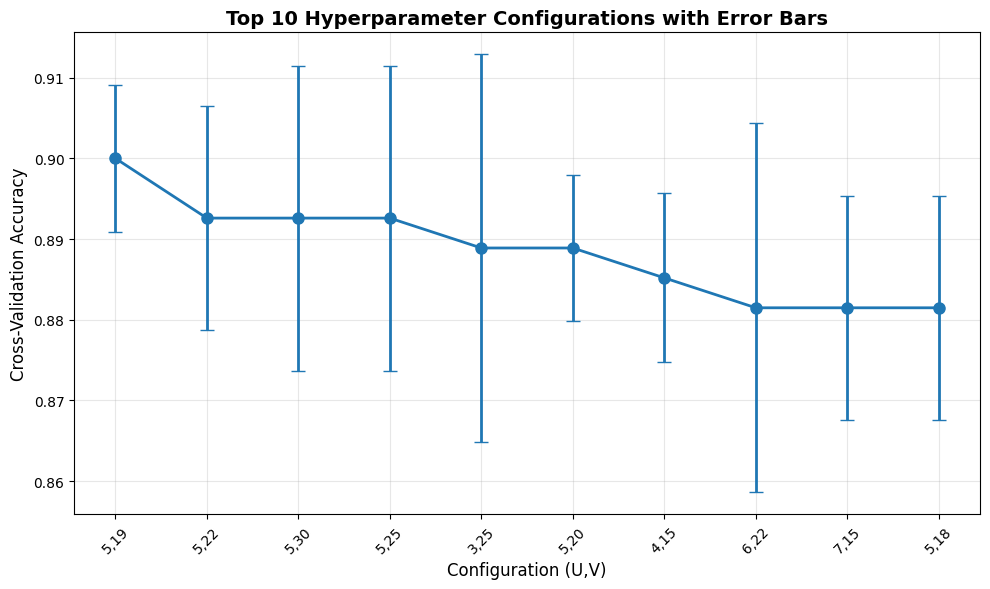

Top 10 Configurations:
U=5, V=19: 0.9000 ± 0.0091
U=5, V=22: 0.8926 ± 0.0139
U=5, V=30: 0.8926 ± 0.0189
U=5, V=25: 0.8926 ± 0.0189
U=3, V=25: 0.8889 ± 0.0240
U=5, V=20: 0.8889 ± 0.0091
U=4, V=15: 0.8852 ± 0.0105
U=6, V=22: 0.8815 ± 0.0228
U=7, V=15: 0.8815 ± 0.0139
U=5, V=18: 0.8815 ± 0.0139


In [29]:
# Standalone Error Bars Plot for Top 10 Configurations
plt.figure(figsize=(10, 6))

df_means = df_all_cv.groupby(['U', 'V']).agg({
    'mean_accuracy': 'mean',
    'std_accuracy': 'mean'
}).reset_index()

# Create x-axis labels
df_means['config'] = df_means['U'].astype(str) + ',' + df_means['V'].astype(str)
df_means_sorted = df_means.sort_values('mean_accuracy', ascending=False).head(10)

plt.errorbar(range(len(df_means_sorted)), df_means_sorted['mean_accuracy'], 
             yerr=df_means_sorted['std_accuracy'], fmt='o-', capsize=5, 
             linewidth=2, markersize=8)
plt.xticks(range(len(df_means_sorted)), df_means_sorted['config'], rotation=45)
plt.xlabel('Configuration (U,V)', fontsize=12)
plt.ylabel('Cross-Validation Accuracy', fontsize=12)
plt.title('Top 10 Hyperparameter Configurations with Error Bars', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('top_configurations_error_bars.png', dpi=300, bbox_inches='tight')
plt.show()

# Print the actual values for reference
print("Top 10 Configurations:")
for i, row in df_means_sorted.iterrows():
    print(f"U={row['U']}, V={row['V']}: {row['mean_accuracy']:.4f} ± {row['std_accuracy']:.4f}")

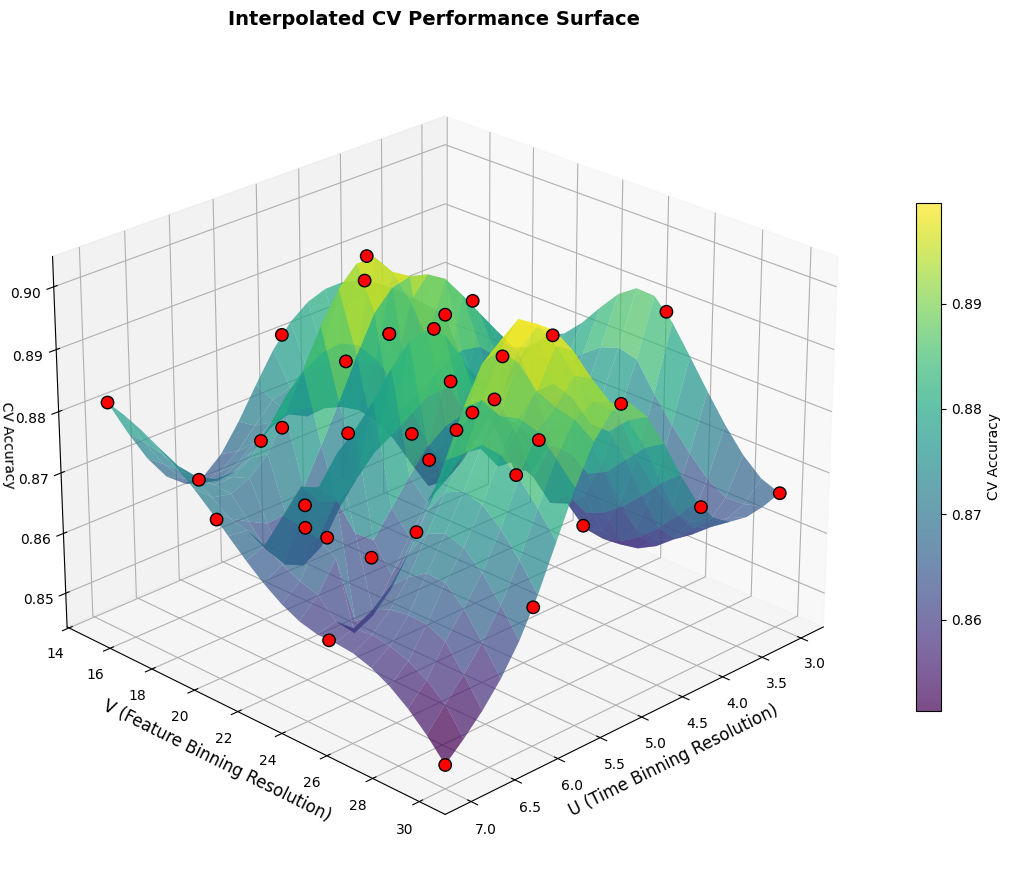

In [ ]:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

U_dense = np.linspace(df_all_cv['U'].min(), df_all_cv['U'].max(), 20)
V_dense = np.linspace(df_all_cv['V'].min(), df_all_cv['V'].max(), 20)
U_grid, V_grid = np.meshgrid(U_dense, V_dense)

# Interpolate accuracy values
points = df_all_cv[['U', 'V']].values
values = df_all_cv['mean_accuracy'].values
Z_interp = griddata(points, values, (U_grid, V_grid), method='cubic')

# Create surface plot
surf = ax.plot_surface(U_grid, V_grid, Z_interp, cmap='viridis', alpha=0.7)

# Add scatter points for actual measurements
scatter = ax.scatter(df_all_cv['U'], df_all_cv['V'], df_all_cv['mean_accuracy'], 
                    c='red', s=80, alpha=1.0, edgecolor='black', linewidth=1)

ax.set_xlabel('U (Time Binning Resolution)', fontsize=12)
ax.set_ylabel('V (Feature Binning Resolution)', fontsize=12)
ax.set_zlabel('CV Accuracy\n', fontsize=10)
ax.set_title('Interpolated CV Performance Surface', fontsize=14, fontweight='bold')

# Add colorbar
fig.colorbar(surf, ax=ax, shrink=0.6, aspect=20, label='CV Accuracy')

ax.view_init(elev=25, azim=45)
plt.tight_layout()
plt.savefig('cv_performance_3d_interpolated.png', dpi=300, bbox_inches='tight')
plt.show()